In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uidai-data/api_data_aadhar_enrolment_0_500000.csv
/kaggle/input/uidai-data/api_data_aadhar_enrolment_500000_1000000.csv
/kaggle/input/uidai-data/api_data_aadhar_enrolment_1000000_1006029.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "/kaggle/input/uidai-data/api_data_aadhar_enrolment_0_500000.csv",
    "/kaggle/input/uidai-data/api_data_aadhar_enrolment_500000_1000000.csv",
    "/kaggle/input/uidai-data/api_data_aadhar_enrolment_1000000_1006029.csv"
]

df = pd.concat(
    (pd.read_csv(f) for f in files),
    ignore_index=True
)


In [3]:
df.shape

(1006029, 7)

In [4]:
df.to_csv("uidai_enrolment_full.csv", index=False)


In [5]:
df1 = df.copy()

In [6]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [7]:
df[df.duplicated()].head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
360605,13-10-2025,Punjab,Jalandhar,144041,2,1,0
360606,13-10-2025,Punjab,Jalandhar,144101,1,0,0
360607,13-10-2025,Punjab,Jalandhar,144102,2,0,0
360608,13-10-2025,Punjab,Jalandhar,144418,1,0,0
360609,13-10-2025,Punjab,Jalandhar,144419,1,0,0


In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [11]:

df = df[~((df['state'] == 100000) &
          (df['district'] == 100000) &
          (df['pincode'] == 100000))]


In [12]:
df['state']

0              Meghalaya
1              Karnataka
2          Uttar Pradesh
3          Uttar Pradesh
4              Karnataka
               ...      
1006024      West Bengal
1006025      West Bengal
1006026      West Bengal
1006027      West Bengal
1006028      West Bengal
Name: state, Length: 983072, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983072 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            983072 non-null  object
 1   state           983072 non-null  object
 2   district        983072 non-null  object
 3   pincode         983072 non-null  int64 
 4   age_0_5         983072 non-null  int64 
 5   age_5_17        983072 non-null  int64 
 6   age_18_greater  983072 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 60.0+ MB


In [14]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


In [15]:
df = df[df['state'] != '100000']


In [16]:
df['state'] = df['state'].str.lower().str.strip()

In [17]:
state_map = {
    'west bengal': 'west bengal',
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',
    'west  bengal': 'west bengal',
    'odisha': 'odisha',
    'orissa': 'odisha',
    'andhra pradesh': 'andhra pradesh',
    'andhra pradesh': 'andhra pradesh',  # ensure spelling consistent
    'jammu & kashmir': 'jammu and kashmir',
    'jammu and kashmir': 'jammu and kashmir',
    'jammu and kashmir': 'jammu and kashmir',
    'dadra & nagar haveli': 'dadra and nagar haveli',
    'dadra and nagar haveli': 'dadra and nagar haveli',
    'daman & diu': 'daman and diu',
    'daman and diu': 'daman and diu',
    'pondicherry': 'puducherry',
    'andaman & nicobar islands': 'andaman and nicobar islands',
    'andaman and nicobar islands': 'andaman and nicobar islands',
    'westbengal': 'west bengal'
    # add more mappings as needed
}


In [18]:
df['state'] = df['state'].replace(state_map)


In [19]:
df['state'].unique()


array(['meghalaya', 'karnataka', 'uttar pradesh', 'bihar', 'maharashtra',
       'haryana', 'rajasthan', 'punjab', 'delhi', 'madhya pradesh',
       'west bengal', 'assam', 'uttarakhand', 'gujarat', 'andhra pradesh',
       'tamil nadu', 'chhattisgarh', 'jharkhand', 'nagaland', 'manipur',
       'telangana', 'tripura', 'mizoram', 'jammu and kashmir',
       'chandigarh', 'sikkim', 'odisha', 'kerala',
       'the dadra and nagar haveli and daman and diu',
       'arunachal pradesh', 'himachal pradesh', 'goa',
       'dadra and nagar haveli and daman and diu', 'ladakh',
       'andaman and nicobar islands', 'puducherry', 'lakshadweep',
       'dadra and nagar haveli', 'daman and diu'], dtype=object)

In [20]:
# All variations mapped to one canonical UT
dadra_map = {
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli and daman and diu': 'dadra and nagar haveli and daman and diu'
}

# Apply to your state column
df['state'] = df['state'].replace(dadra_map)


In [21]:
# Remove leading "the " from state names
df['state'] = df['state'].str.lower().str.strip().str.replace(r'^the\s+', '', regex=True)

# Now apply your canonical mapping
state_map = {
    'dadra and nagar haveli and daman and diu': 'dadra and nagar haveli and daman and diu',
    # add other mappings if needed
}

df['state'] = df['state'].replace(state_map)


In [22]:
df['district'].nunique()

984

In [23]:
# Remove asterisks and extra spaces
df['district'] = df['district'].str.replace(r'[*]', '', regex=True).str.strip()


In [24]:
import plotly.express as px

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.bar(
    state_counts,
    x='state',
    y='count',
    title='State Count Distribution',
    hover_data={'state': True, 'count': True}
)

fig.update_layout(
    xaxis_title='State',
    yaxis_title='State Count',
    xaxis_tickangle=-45
)

fig.show()


# UP has highest enrollment in 2025

In [25]:
print(df['date'].min())
print(df['date'].max())

2025-03-02 00:00:00
2025-12-31 00:00:00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983051 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983051 non-null  datetime64[ns]
 1   state           983051 non-null  object        
 2   district        983051 non-null  object        
 3   pincode         983051 non-null  int64         
 4   age_0_5         983051 non-null  int64         
 5   age_5_17        983051 non-null  int64         
 6   age_18_greater  983051 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 60.0+ MB


In [27]:
df.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater
count,983051,983051.000000,983051.000000,983051.000000,983051.000000
mean,2025-10-23 05:35:28.046255872,518478.258356,3.534292,1.720061,0.169115
min,2025-03-02 00:00:00,110001.000000,0.000000,0.000000,0.000000
25%,2025-09-18 00:00:00,363630.000000,1.000000,0.000000,0.000000
50%,2025-10-26 00:00:00,517403.000000,2.000000,0.000000,0.000000
75%,2025-11-15 00:00:00,700093.000000,3.000000,1.000000,0.000000
max,2025-12-31 00:00:00,855456.000000,2688.000000,1812.000000,855.000000
std,NaN,205485.496222,17.726430,14.529913,3.251934


In [28]:
df[df['age_0_5']!=0].count()

date              870293
state             870293
district          870293
pincode           870293
age_0_5           870293
age_5_17          870293
age_18_greater    870293
dtype: int64

In [29]:
# Age-wise total enrollment
total_age_0_5 = df['age_0_5'].sum()
total_age_5_17 = df['age_5_17'].sum()
total_age_18_greater = df['age_18_greater'].sum()

print(f"Total enrollment age 0-5: {total_age_0_5}")
print(f"Total enrollment age 5-17: {total_age_5_17}")
print(f"Total enrollment age 18+: {total_age_18_greater}")


Total enrollment age 0-5: 3474389
Total enrollment age 5-17: 1690908
Total enrollment age 18+: 166249


# Age wise count gives us the info that as the age is less the enrolment number is more its due to new enrollment

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983051 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983051 non-null  datetime64[ns]
 1   state           983051 non-null  object        
 2   district        983051 non-null  object        
 3   pincode         983051 non-null  int64         
 4   age_0_5         983051 non-null  int64         
 5   age_5_17        983051 non-null  int64         
 6   age_18_greater  983051 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 60.0+ MB


In [31]:
df['pincode'].value_counts().head(30)

pincode
500055    269
500018    263
500005    242
110053    216
431001    214
743329    212
244102    206
831002    200
713143    199
110032    194
500087    193
831012    190
110093    190
500049    190
853204    190
500072    189
700135    186
450661    184
400078    181
497001    181
735211    180
396230    178
515865    177
736121    176
600100    176
110094    175
509129    174
400097    174
500008    174
782446    172
Name: count, dtype: int64

In [32]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,uttar pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,uttar pradesh,Aligarh,202133,62,29,15
4,2025-03-09,karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,2025-12-31,west bengal,West Midnapore,721149,2,0,0
1006025,2025-12-31,west bengal,West Midnapore,721150,2,2,0
1006026,2025-12-31,west bengal,West Midnapore,721305,0,1,0
1006027,2025-12-31,west bengal,West Midnapore,721504,1,0,0


In [33]:
df['total_enroll'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983051 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983051 non-null  datetime64[ns]
 1   state           983051 non-null  object        
 2   district        983051 non-null  object        
 3   pincode         983051 non-null  int64         
 4   age_0_5         983051 non-null  int64         
 5   age_5_17        983051 non-null  int64         
 6   age_18_greater  983051 non-null  int64         
 7   total_enroll    983051 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 67.5+ MB


In [35]:
df.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
count,983051,983051.000000,983051.000000,983051.000000,983051.000000,983051.000000
mean,2025-10-23 05:35:28.046255872,518478.258356,3.534292,1.720061,0.169115,5.423468
min,2025-03-02 00:00:00,110001.000000,0.000000,0.000000,0.000000,1.000000
25%,2025-09-18 00:00:00,363630.000000,1.000000,0.000000,0.000000,1.000000
50%,2025-10-26 00:00:00,517403.000000,2.000000,0.000000,0.000000,2.000000
75%,2025-11-15 00:00:00,700093.000000,3.000000,1.000000,0.000000,5.000000
max,2025-12-31 00:00:00,855456.000000,2688.000000,1812.000000,855.000000,3965.000000
std,NaN,205485.496222,17.726430,14.529913,3.251934,31.932495


In [36]:
df['state'].unique()

array(['meghalaya', 'karnataka', 'uttar pradesh', 'bihar', 'maharashtra',
       'haryana', 'rajasthan', 'punjab', 'delhi', 'madhya pradesh',
       'west bengal', 'assam', 'uttarakhand', 'gujarat', 'andhra pradesh',
       'tamil nadu', 'chhattisgarh', 'jharkhand', 'nagaland', 'manipur',
       'telangana', 'tripura', 'mizoram', 'jammu and kashmir',
       'chandigarh', 'sikkim', 'odisha', 'kerala',
       'dadra and nagar haveli and daman and diu', 'arunachal pradesh',
       'himachal pradesh', 'goa', 'ladakh', 'andaman and nicobar islands',
       'puducherry', 'lakshadweep'], dtype=object)

In [37]:
# Create 5 binary features for regions (NEWSC)
df['is_north'] = (df['state'].str.lower().str.strip().isin([
    'delhi', 'chandigarh', 'jammu and kashmir', 'ladakh',
    'punjab', 'haryana', 'himachal pradesh', 'uttarakhand',
    'uttar pradesh', 'rajasthan'
])).astype(int)

df['is_east'] = (df['state'].str.lower().str.strip().isin([
    'west bengal', 'odisha', 'bihar', 'jharkhand', 'sikkim',
    'assam', 'meghalaya', 'arunachal pradesh', 'nagaland',
    'manipur', 'mizoram', 'tripura'
])).astype(int)

df['is_west'] = (df['state'].str.lower().str.strip().isin([
    'gujarat', 'maharashtra', 'goa',
    'dadra and nagar haveli and daman and diu'
])).astype(int)

df['is_south'] = (df['state'].str.lower().str.strip().isin([
    'andhra pradesh', 'telangana', 'karnataka', 'kerala',
    'tamil nadu', 'puducherry', 'lakshadweep',
    'andaman and nicobar islands'
])).astype(int)

df['is_central'] = (df['state'].str.lower().str.strip().isin([
    'madhya pradesh', 'chhattisgarh'
])).astype(int)

# Create 1 binary feature for UT
df['is_ut'] = (df['state'].str.lower().str.strip().isin([
    'delhi', 'chandigarh', 'jammu and kashmir', 'ladakh',
    'dadra and nagar haveli and daman and diu',
    'puducherry', 'lakshadweep', 'andaman and nicobar islands'
])).astype(int)

<Axes: >

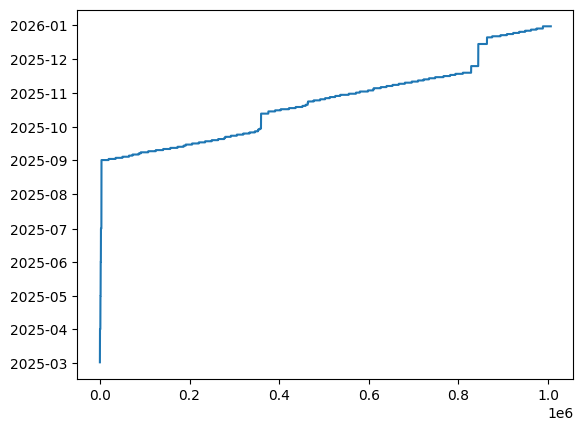

In [38]:
df['date'].plot()

# From Sept the enrollment has shoot up

<Axes: >

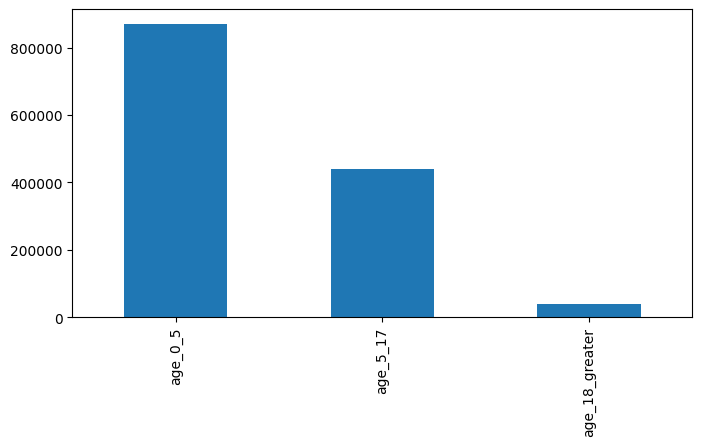

In [39]:
age_presence_count = (df[['age_0_5','age_5_17','age_18_greater']] > 0).sum()

age_presence_count.plot(kind='bar', figsize=(8,4))


# As the age is less there are more enrollment because adhar was established way back in 2009 so many people started getting enrolled

In [40]:
import seaborn as sns

In [41]:
mask = (df[['age_0_5', 'age_5_17', 'age_18_greater']] > 0).all(axis=1)
print(df[mask]['district'].value_counts().head())
print(df[mask]['state'].value_counts().head())

district
Bengaluru           600
Bahraich            440
West Champaran      284
East Champaran      264
East Khasi Hills    236
Name: count, dtype: int64
state
uttar pradesh     4766
bihar             2727
madhya pradesh    1701
gujarat           1578
assam             1546
Name: count, dtype: int64


In [42]:
df


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enroll,is_north,is_east,is_west,is_south,is_central,is_ut
0,2025-03-02,meghalaya,East Khasi Hills,793121,11,61,37,109,0,1,0,0,0,0
1,2025-03-09,karnataka,Bengaluru Urban,560043,14,33,39,86,0,0,0,1,0,0
2,2025-03-09,uttar pradesh,Kanpur Nagar,208001,29,82,12,123,1,0,0,0,0,0
3,2025-03-09,uttar pradesh,Aligarh,202133,62,29,15,106,1,0,0,0,0,0
4,2025-03-09,karnataka,Bengaluru Urban,560016,14,16,21,51,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006024,2025-12-31,west bengal,West Midnapore,721149,2,0,0,2,0,1,0,0,0,0
1006025,2025-12-31,west bengal,West Midnapore,721150,2,2,0,4,0,1,0,0,0,0
1006026,2025-12-31,west bengal,West Midnapore,721305,0,1,0,1,0,1,0,0,0,0
1006027,2025-12-31,west bengal,West Midnapore,721504,1,0,0,1,0,1,0,0,0,0


In [43]:
from scipy.stats import mannwhitneyu

# Group A: North + East
group_A = df[(df['is_north'] == 1) | (df['is_east'] == 1)]['age_18_greater']

# Group B: All other regions
group_B = df[(df['is_west'] == 1) | 
             (df['is_south'] == 1) | 
             (df['is_central'] == 1) | 
             (df['is_ut'] == 1)]['age_18_greater']

# Optional but sensible: remove zero-only enrollments
group_A = group_A[group_A > 0]
group_B = group_B[group_B > 0]

# One-sided test: A > B
u_stat, p_value = mannwhitneyu(
    group_A,
    group_B,
    alternative='greater'
)

u_stat, p_value


(np.float64(207902491.5), np.float64(2.675345503845105e-25))

# In North and NorthEastern Area the enrollment for 18+ is significantly higher than the other region this can be due to lack of resources

In [44]:
print(f"age 5 - 17{df[df['age_5_17'] > 0]['district'].value_counts().head(10)}")
print(f" age 0 - 5 {df[df['age_0_5'] > 0]['district'].value_counts().head(10)}")

print(f"age 5 - 17 {df[df['age_5_17'] > 0]['state'].value_counts().head(10)}")
print(f"age 0 - 5 {df[df['age_0_5'] > 0]['state'].value_counts().head(10)}")


age 5 - 17district
North 24 Parganas    3240
South 24 Parganas    2965
Jaipur               2924
Patna                2811
Saran                2672
Pune                 2664
Azamgarh             2554
Aurangabad           2522
Thane                2442
Malappuram           2377
Name: count, dtype: int64
 age 0 - 5 district
Pune                 5937
North 24 Parganas    5399
Barddhaman           4615
Bengaluru            4460
Hyderabad            4406
Murshidabad          4303
Jaipur               4119
K.v. Rangareddy      4073
South 24 Parganas    3991
East Godavari        3975
Name: count, dtype: int64
age 5 - 17 state
uttar pradesh     83738
bihar             49000
west bengal       35998
rajasthan         34109
maharashtra       28149
tamil nadu        26544
madhya pradesh    26433
assam             17265
gujarat           16373
karnataka         15818
Name: count, dtype: int64
age 0 - 5 state
uttar pradesh     89465
tamil nadu        82171
maharashtra       69348
west bengal       

# “District-level enrollment highlights the role of urbanization and administrative readiness in early-age Aadhaar registration, whereas state-level enrollment rankings largely reflect population scale rather than superior adoption behavior.

In [45]:
print(df['state'].value_counts().head(10))
print(df['district'].value_counts().head(10))
print(df['pincode'].value_counts().head(10))

state
uttar pradesh     108066
tamil nadu         90388
maharashtra        75531
west bengal        75371
karnataka          68787
andhra pradesh     63837
bihar              58542
rajasthan          54864
madhya pradesh     49562
odisha             45942
Name: count, dtype: int64
district
Pune                 6515
North 24 Parganas    6404
Barddhaman           5255
Bengaluru            5216
Hyderabad            4866
Malappuram           4650
Jaipur               4562
South 24 Parganas    4507
Murshidabad          4475
K.v. Rangareddy      4450
Name: count, dtype: int64
pincode
500055    269
500018    263
500005    242
110053    216
431001    214
743329    212
244102    206
831002    200
713143    199
110032    194
Name: count, dtype: int64


In [46]:
import pandas as pd
from scipy.stats import pearsonr

# 1. State-level Correlation (Population Scale)
state_data = df.groupby('state').agg({'total_enroll': 'sum', 'age_0_5': 'sum'})
r_state, _ = pearsonr(state_data['total_enroll'], state_data['age_0_5'])

# 2. District-level Correlation (Administrative Readiness)
district_data = df.groupby('district').agg({'total_enroll': 'sum', 'age_0_5': 'sum'})
r_dist, _ = pearsonr(district_data['total_enroll'], district_data['age_0_5'])

# Results
print(f"State Correlation: {r_state:.4f}")
print(f"District Correlation: {r_dist:.4f}")

State Correlation: 0.9646
District Correlation: 0.9317


In [47]:
print(df[df['date'].dt.month == 12].groupby(df['date'].dt.month)['district'].value_counts().head(60))

date  district          
12    Pune                  1097
      North 24 Parganas      926
      Barddhaman             828
      Bengaluru              820
      Malappuram             788
      Ahmadnagar             762
      Guntur                 752
      Hyderabad              724
      Palakkad               724
      East Godavari          716
      Jaipur                 704
      South 24 Parganas      704
      K.v. Rangareddy        668
      Tirunelveli            663
      Hooghly                662
      Thrissur               659
      Mumbai                 657
      Visakhapatnam          655
      Kurnool                641
      Kancheepuram           637
      Paschim Medinipur      634
      Ahmedabad              633
      Murshidabad            630
      Belagavi               627
      Ganjam                 623
      Thiruvananthapuram     620
      Salem                  614
      Thane                  612
      Chittoor               596
      Vellore     

In [48]:
df['date'].dt.date.value_counts().sort_values(ascending = False).head(60)

date
2025-12-15    19325
2025-10-30    18231
2025-12-22    17905
2025-11-02    17521
2025-11-19    17334
2025-11-15    17102
2025-10-17    16924
2025-09-09    16788
2025-09-08    16767
2025-12-31    16628
2025-09-10    16518
2025-11-18    16314
2025-09-12    16106
2025-09-01    15971
2025-09-11    15949
2025-09-02    15621
2025-11-25    15613
2025-11-05    15587
2025-09-03    15329
2025-10-31    15324
2025-10-13    15206
2025-09-16    14991
2025-10-18    14933
2025-11-10    14795
2025-09-18    14711
2025-09-04    14558
2025-09-19    14347
2025-09-15    14331
2025-09-24    14327
2025-12-23    14260
2025-12-29    14137
2025-10-15    14116
2025-09-17    14021
2025-11-16    14011
2025-10-19    13958
2025-09-25    13901
2025-09-06    13739
2025-10-25    13652
2025-09-13    13598
2025-09-20    13596
2025-11-09    13467
2025-11-08    13465
2025-12-24    13409
2025-09-23    13381
2025-11-14    13359
2025-12-26    13259
2025-12-25    13257
2025-11-07    13113
2025-11-11    13016
2025-11-06    1

In [49]:
# 1. Get districts active in the first half of the year
early_districts = set(df[df['date'].dt.month < 7]['district'].unique())

# 2. Get districts active in the late 2025 hike
late_districts = set(df[df['date'].dt.month >= 9]['district'].unique())

# 3. Find 'New' districts (The ASK effect)
new_service_areas = late_districts - early_districts

print(f"Number of new districts served after ASKs established: {len(new_service_areas)}")
print(f"Example of new areas: {list(new_service_areas)[:5]}")

Number of new districts served after ASKs established: 586
Example of new areas: ['Chikmagalur', 'Hnahthial', 'Tumkur', 'Imphal East', 'Kendujhar']


In [50]:
# Compare Adult vs Child growth post-July
july_onwards = df[df['date'].dt.month >= 7]
print(july_onwards.groupby(july_onwards['date'].dt.month)[['age_18_greater', 'age_0_5']].sum())

      age_18_greater  age_0_5
date                         
7              35183   318352
9              14854   995612
10             15421   536781
11             24438   742020
12             14168   540818
